###actual measurements of the light that comes out of UV projector version 2

#####performed 03 September 2015

In [2]:
import djd.jeti as jeti
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = jeti.jetitodict(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2.csv')
#uv = jeti.jetitodict(r'\\Drobo5N\Public\Dan\dome\luminance_uvProjector2\uv_set1.csv')

In [7]:
data.keys()

['wavelengths',
 'luminance',
 'green_70',
 'uv_90',
 'green_50',
 'Lv [cd/sqm]',
 'Le [W/(sr*sqm)] (380-780nm)',
 'green_10',
 'green_80',
 'uv_20',
 'Date',
 'green_20',
 'uv_60',
 'uv_40',
 'uv_100',
 'Name',
 'green_40',
 'uv_80',
 'green_60',
 'readings',
 'green_0',
 'green_100',
 'Time',
 'uv_0',
 'uv_10',
 'uv_70',
 'uv_30',
 'green_90',
 'green_30',
 'UV_50']

In [11]:
data['uv_50']=data['UV_50']

In [9]:
wavelengths = data['wavelengths']
contrasts = np.linspace(0,100,11)

In [13]:
uv = data
green = data

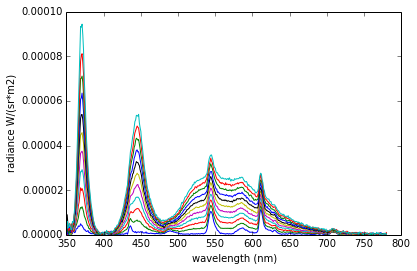

In [31]:
for contrast in contrasts:
    plt.plot(wavelengths,uv['uv_'+str(int(contrast))]+green['green_'+str(int(contrast))])
plt.xlabel('wavelength (nm)')
plt.ylabel('radiance W/(sr*m2)')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_contrast_spectra.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_contrast_spectra.eps',format='eps')

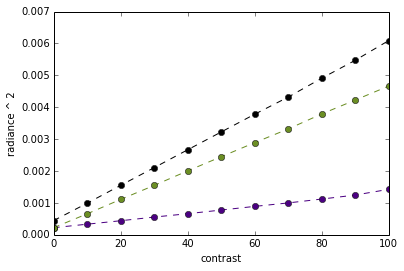

In [30]:
total_irradiance_uv = []
total_irradiance_green = []
total_irradiance = []
for contrast in contrasts:
    both = uv['uv_'+str(int(contrast))]+green['green_'+str(int(contrast))]
    total_irradiance.append(np.trapz(both[:300]))
    total_irradiance_uv.append(np.trapz(uv['uv_'+str(int(contrast))][:300]))
    total_irradiance_green.append(np.trapz(green['green_'+str(int(contrast))][:300]))
plt.plot(contrasts,total_irradiance,'--o',color='k')
plt.plot(contrasts,total_irradiance_uv,'--o',color='#4B0082')
plt.plot(contrasts,total_irradiance_green,'--o',color='#6B8E23')
plt.xlabel('contrast')
plt.ylabel('radiance ^ 2')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_contrast.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_contrast.eps',format='eps')

In [25]:
wv = np.linspace(350,700,350)
mso = np.zeros(350);mso[:249]=jeti.mso
green_max=green['green_100']
uv_max=uv['uv_100']

In [27]:
np.shape(uv_max)

(431L,)

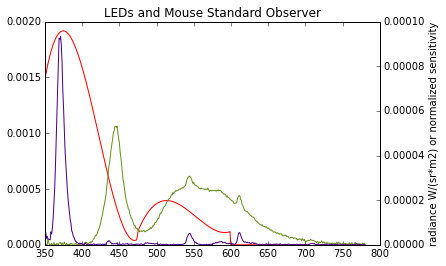

In [29]:
f,ax = plt.subplots(1)
ax.plot(np.linspace(350,700,350),mso/2500,color='r')
axR=ax.twinx()
axR.plot(np.linspace(350,780,431),green_max,color='#6B8E23')
axR.plot(np.linspace(350,780,431),uv_max,color='#4B0082')
plt.xlabel('wavelength (nm)')
plt.ylabel('radiance W/(sr*m2) or normalized sensitivity')
plt.title('LEDs and Mouse Standard Observer')
f=plt.gcf()
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_max.png',format='png')
f.savefig(r'\\Drobo5N\Public\Dan\dome\luminance_measurement_p2_max.eps',format='eps')

green: 6.31392466128
white: 11.7728662689
0.536311592868  <-- green / UV effectiveness


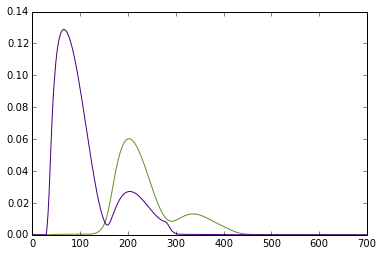

In [70]:
plt.plot(np.convolve(mso,green_max),color='#6B8E23')
plt.plot(np.convolve(mso,uv_max),color='#4B0082')
print 'green: '+str(np.trapz(np.convolve(mso,green_max)))
print 'white: '+str(np.trapz(np.convolve(mso,uv_max)))
print str(np.trapz(np.convolve(mso,green_max))/np.trapz(np.convolve(mso,uv_max)))+'  <-- '+'green / UV effectiveness'